0.3598032471229786 2.6238837588169495


"\npost = posterior(mu, X[:,0], sigma)\nmax, incertidumbre = maximo_incertidumbre(mu, np.log(post))\nplt.figure()\nplt.plot(mu, post)\nplt.title('$\\mu$= {:.2f} $\\pm$ {:.2f}'.format(max, incertidumbre))\nplt.xlabel('$\\mu$')\nplt.ylabel('prob($\\mu$|datos)')\nplt.savefig('mean.png')\n"

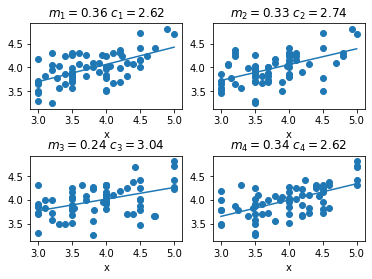

In [6]:

import numpy as np
import matplotlib.pyplot as plt

def prior(mu):
    """
    Densidad de probabilidad de mu
    """
    p = np.ones(len(mu))/(mu.max()-mu.min())
    return p

def like(x, sigma, mu):
    """
    Likelihod de tener un dato x e incertidumbre sigma
    """
    L = np.ones(len(mu))
    
    """
    for x_i in (x):
        L *= (1.0/np.sqrt(2.0*np.pi*sigma**2))*np.exp(-0.5*(x_i-mu)**2/(sigma**2))
    return L
    """
    for x_i in (x):
        L += np.sum((a*x+c-y)**2)**((len(y)*-1.)/-2.)
    return L

def posterior(mu, x, sigma):
    """
    Posterior calculado con la normalizacion adecuada
    """
    post =  like(x, sigma, mu) * prior(mu)
    evidencia = np.trapz(post, mu)
    return  post/evidencia

def estimados(x,y,sigma):
    w=2./sigma**2
    alfa=w*np.sum(x**2)
    beta=len(x)*w
    gamma=np.sum(x)*w
    p=np.sum(x*y)*w
    q=np.sum(y)*w
    m=(beta*p-gamma*q)/(alfa*beta-gamma**2)
    c=(alfa*q-gamma*p)/(alfa*beta-gamma**2)
    return m,c

def maximo_incertidumbre(x, y):
    deltax = x[1] - x[0]

    # maximo de y
    ii = np.argmax(y)

    # segunda derivada
    d = (y[ii+1] - 2*y[ii] + y[ii-1]) / (deltax**2)

    return x[ii], 1.0/np.sqrt(-d)
 
def newsigma(a,b,x,y):
    return np.sum((a*x+c-y)**2)**(2)/(len/(y)-1)
    

data = np.loadtxt("notas_andes.dat", skiprows=1)
Y = data[:,4]
X = data[:,:4]
mu = np.linspace(1E-4, 10.0, 1000)
sigma=0.1

m1,c1=estimados(X[:,0],Y,sigma)

print (m1,c1)


plt.figure()
for i in range(4):
    plt.subplot(2,2,i+1)
    xf=np.linspace(np.amin(X[:,i]),np.amax(X[:,i]),1000)
    m,c=estimados(X[:,i],Y,sigma)
    plt.scatter(X[:,i], Y)
    plt.plot(xf,m*xf+c)
    plt.title(r"$m_{}={:.2f}$ $c_{}={:.2f}$".format(i+1,m,i+1,c))
    plt.xlabel("x")
  

plt.subplots_adjust(hspace=0.55)
plt.savefig("bayes.png", bbox_inches='tight')

"""
post = posterior(mu, X[:,0], sigma)
max, incertidumbre = maximo_incertidumbre(mu, np.log(post))
plt.figure()
plt.plot(mu, post)
plt.title('$\mu$= {:.2f} $\pm$ {:.2f}'.format(max, incertidumbre))
plt.xlabel('$\mu$')
plt.ylabel('prob($\mu$|datos)')
plt.savefig('mean.png')
"""